In [1]:
import nn
import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.duplicated().sum()


0

In [7]:
X = df.drop('class', axis=1)
y = pd.DataFrame(df['class'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

In [9]:
def feature_distr(df):
    for feature in df.columns:
        if df[feature].dtype == 'O':
            sns.countplot(x=feature, data=df)
        elif df[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                                   'uint32', 'uint64', 'float_', 'float16', 'float32', 'float64']:
            sns.displot(df[feature].dropna(), bins=40)
        plt.show()

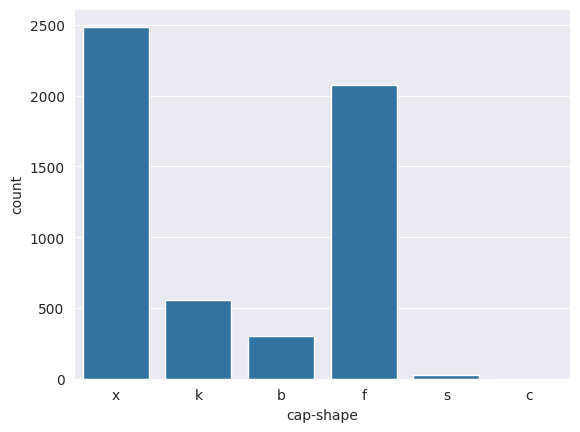

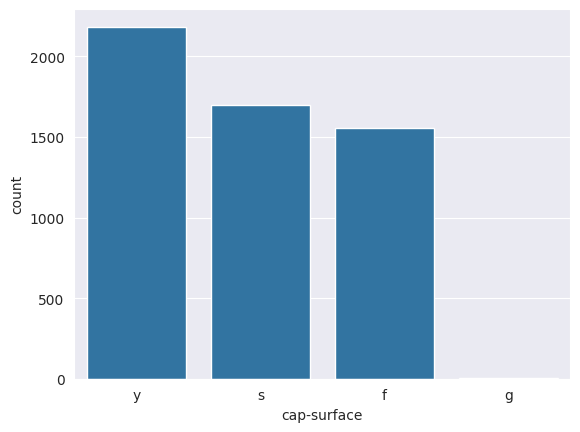

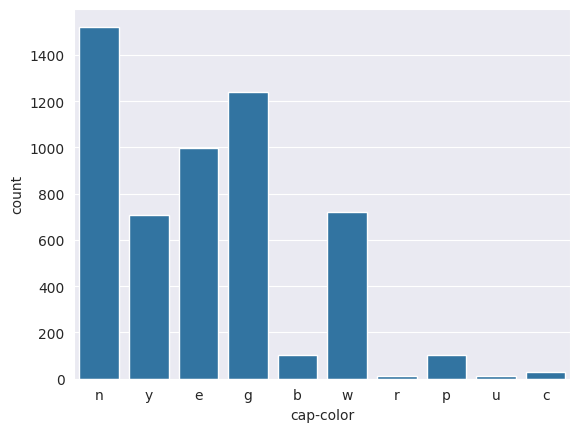

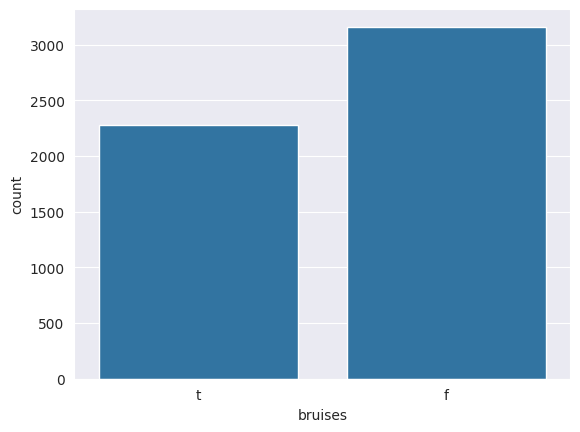

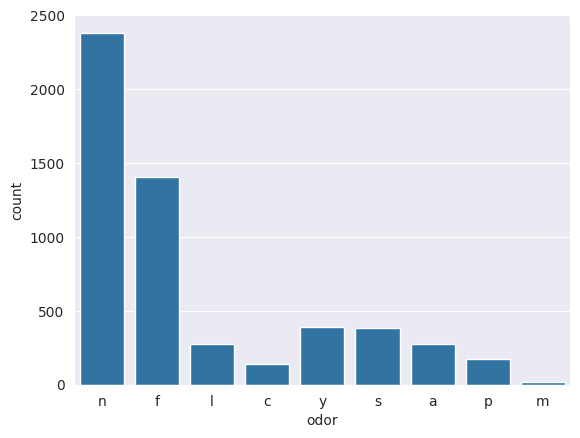

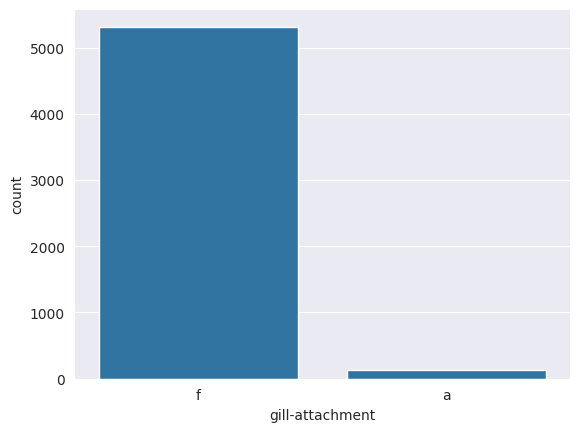

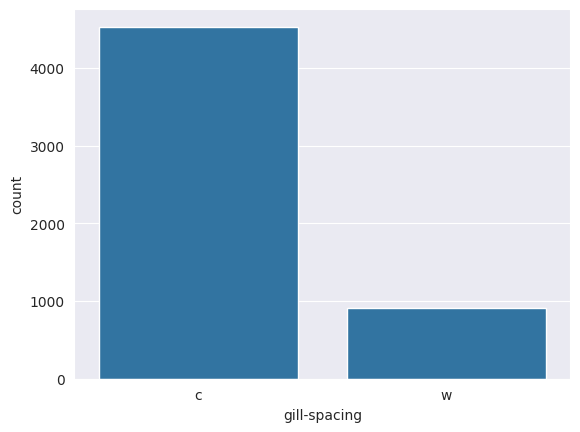

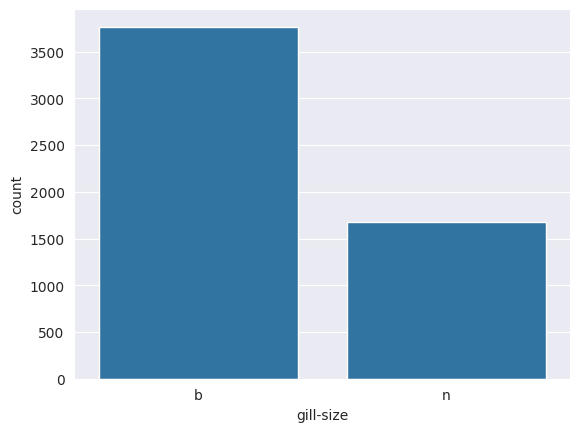

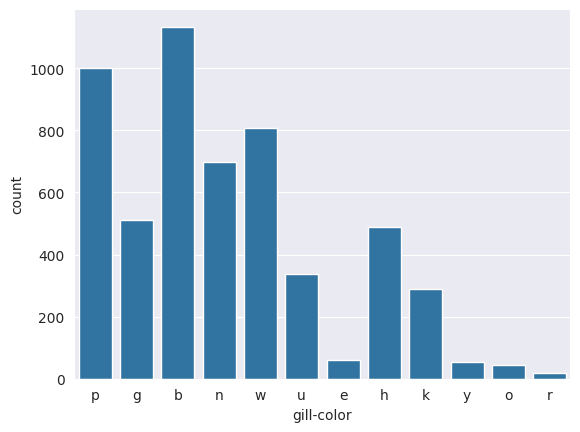

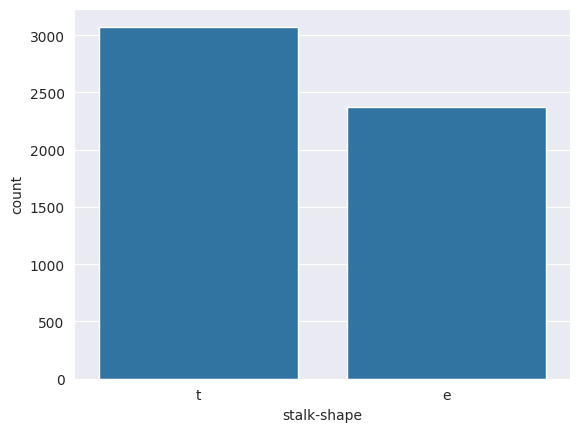

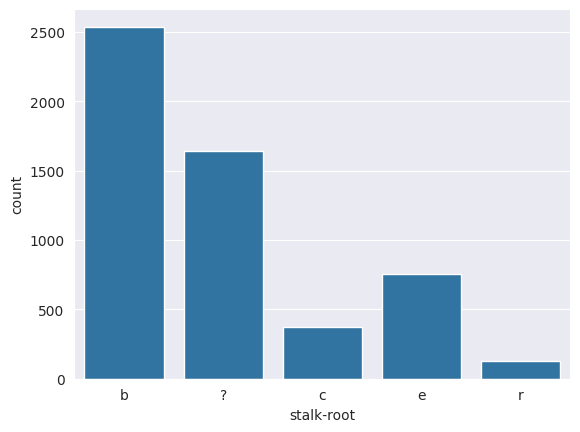

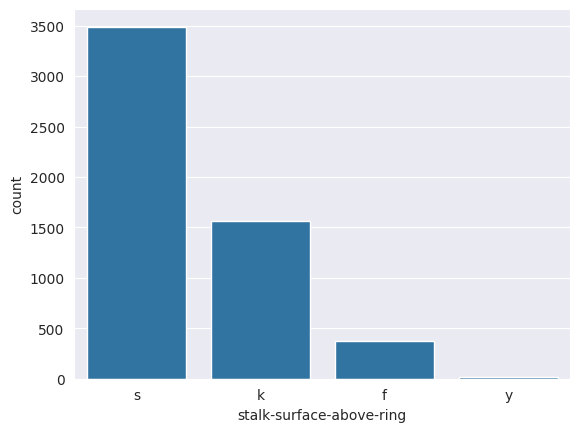

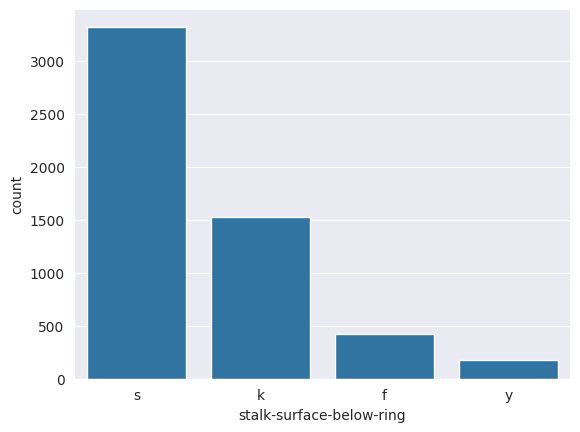

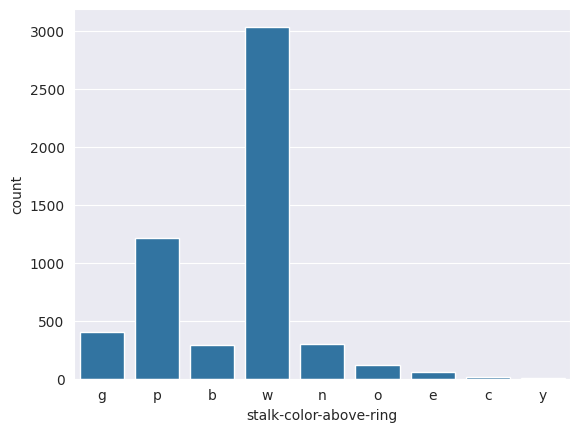

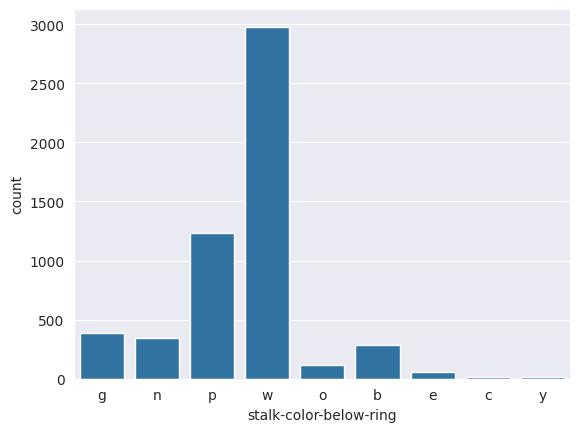

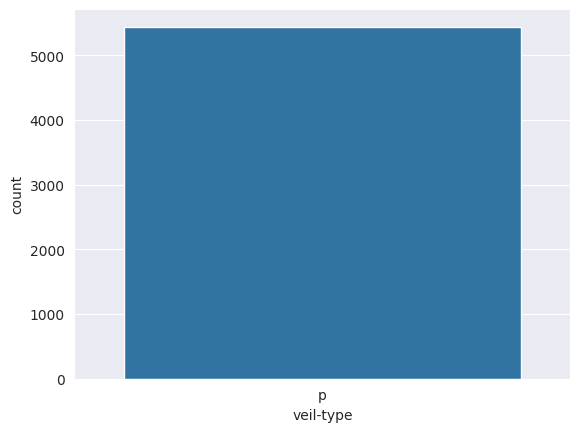

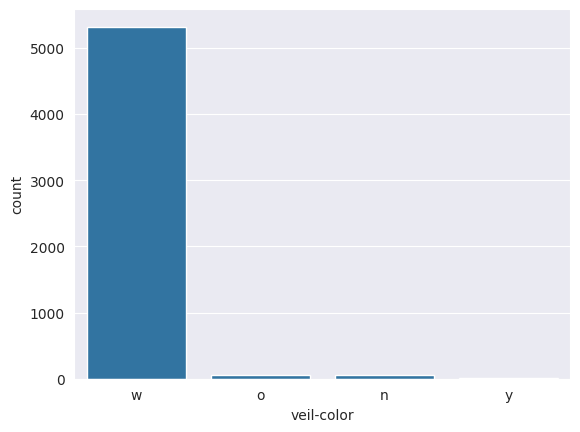

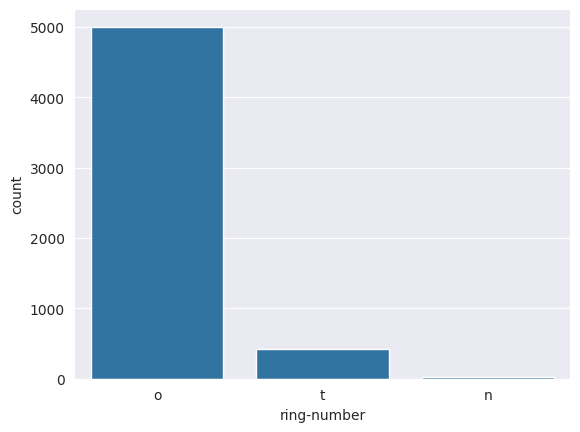

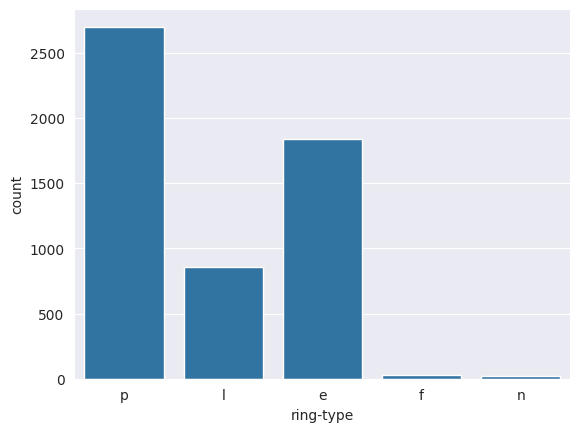

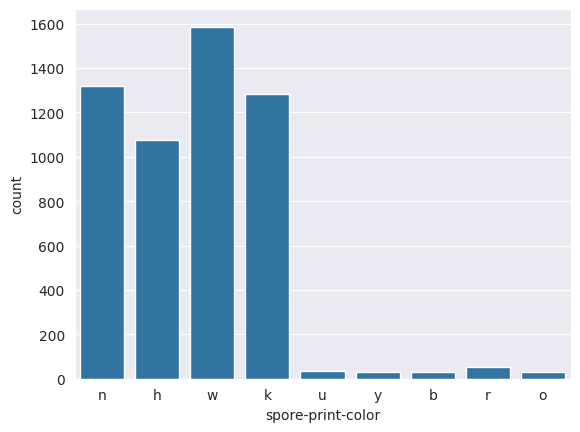

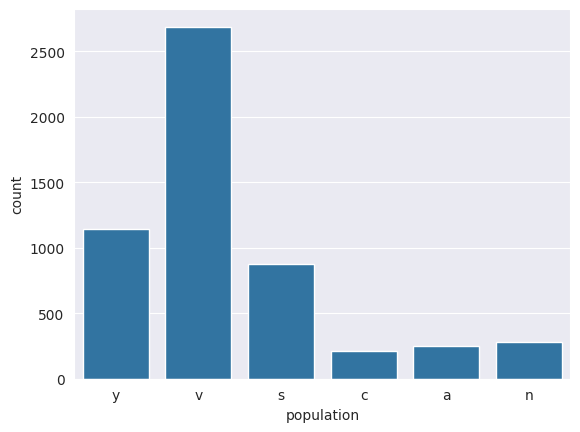

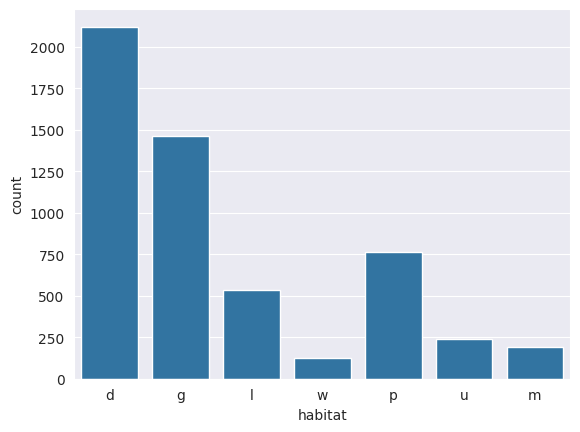

In [10]:
feature_distr(X_train)


In [11]:
columns_to_drop = ["gill-attachment",
                   "gill-spacing",
                   "ring-number",
                   "veil-color",
                   "veil-type", ]

In [12]:
X_train = X_train.drop(columns=columns_to_drop)
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [13]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder()

encoder.fit(X_train)
X_act_train = encoder.transform(X_train)

In [16]:
y_train[y_train == 'p'] = 1
y_train[y_train == 'e'] = 0

y_train = y_train.astype("float32")

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50)

rf.fit(X_act_train, y_train)

/home/vladik/conda/envs/tpns/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50)

In [18]:
feature_imp = pd.Series(rf.feature_importances_)
feature_imp.sort_values(ascending=False)


27     0.608232
49     0.183580
51     0.052332
59     0.045319
88     0.037427
         ...   
38     0.000000
37     0.000000
36     0.000000
35     0.000000
104    0.000000
Length: 105, dtype: float64

<Axes: >

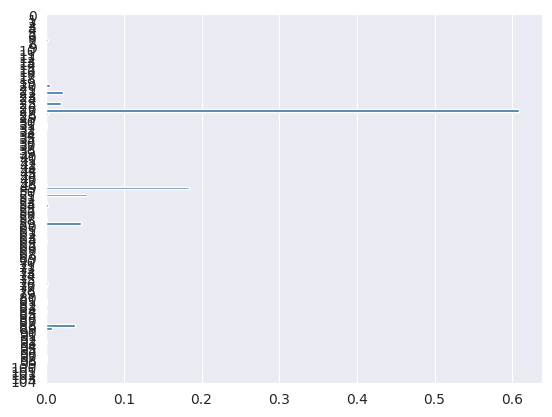

In [19]:
sns.barplot(pd.Series(feature_imp), orient='h')


In [20]:
features = [82, 98, 64, 77, 7, 76, 54, 89, 25, 22, 88, 59, 51, 49, 27]

In [21]:
X_train_numpy = X_act_train.toarray()

In [22]:
X_train_numpy = X_train_numpy[:, features]

In [23]:
X_train_numpy

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [24]:
y_train_numpy = y_train.to_numpy()

In [25]:
model = nn.Model([
    nn.Linear(15, 15),
    nn.Relu(),
    nn.Linear(15, 1),
    nn.Sigmoid(),
])

In [26]:
def train(model: nn.Model, loss: nn.LossFunction, opt: nn.Optimizer, X, Y, i_max=100, eps=1e-3):
    for i in range(i_max):

        y_p = model.forward(X)

        loss_val = loss.calc_loss(Y, y_p)
        grad = loss.calc_gradient(Y, y_p)
        model.backward(grad)

        opt.do_step(model)
        model.zerograd()

        print(loss_val)

        if loss_val <= eps:
            break

In [27]:
def test(model: nn.Model, metric: metrics.Metric, X, Y, treshold=0.5):
    y_p = model.forward(X)
    mask = y_p >= treshold
    y_p[mask] = 1
    y_p[np.logical_not(mask)] = 0
    return metric.calc_loss(Y, y_p)

In [28]:
loss_f = nn.CrossEntropy()
opt = nn.Optimizer(lr=0.1)

In [29]:
train(model, loss_f, opt, X_train_numpy, y_train_numpy)

1.256064070036806
1.1956789548431392
1.1386547252077621
1.0854971832947855
1.0355632594292181
0.988219194382528
0.9438874608278338
0.9023226292684449
0.8632597239015325
0.8265007722844899
0.7918680625406593
0.7590359169674856
0.7276322777288984
0.6982239666405308
0.6709826555652707
0.6452980474267939
0.6209808404840076
0.5983418350022197
0.5770274068610657
0.5566510734941856
0.5372316587777602
0.5187197097989635
0.5011550667520552
0.4856851666481194
0.47095592283737636
0.4569217943203011
0.4435666526617718
0.4309184098149172
0.4190810236287125
0.4079340662700082
0.3972639068131418
0.38706347378549466
0.3772783644612396
0.36790916125526774
0.35890381060820736
0.3502505914209617
0.3419492165665899
0.3339602586904319
0.32628704027631883
0.31909275712036467
0.3122972950205116
0.30575913851348563
0.2994541972769344
0.2933675026887603
0.28750999283799744
0.281849914307577
0.27638805790859705
0.27112584020014424
0.2660326094054313
0.2611213144150921
0.2563786896819614
0.25178923612330917
0.24

In [30]:
X_act_test = X_test.drop(columns=columns_to_drop)
X_act_test = encoder.transform(X_act_test)
X_test_numpy = X_act_test.toarray()
X_test_numpy = X_test_numpy[:, features]
X_test_numpy

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [31]:
y_test[y_test == 'p'] = 1
y_test[y_test == 'e'] = 0

y_test = y_test.astype("float32")

In [32]:
y_test

,class
963,0.0
6805,1.0
4390,1.0
502,0.0
2545,0.0
...,...
5168,1.0
1980,0.0
4831,0.0
725,1.0


In [33]:
metric = metrics.F1Score()
test(model, metric, X_test_numpy, y_test.to_numpy())

0.9828047382499044